<a href="https://colab.research.google.com/github/themuditjain/Analysis-of-Google-Play-Store-Applications/blob/main/Data_Visualization_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

# Taking the datasets as input

In [ ]:
data1 = pd.read_csv("/content/drive/MyDrive/Data Visualization Project/googleplaystore.csv")
data2 = pd.read_csv("/content/drive/MyDrive/Data Visualization Project/googleplaystore_user_reviews.csv")

In [ ]:
data1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Taking care of missing values

In [ ]:
data1.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
data1_1 = data1.dropna()

In [ ]:
data1_1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Now, the dataset has no missing values

In [ ]:
data1_1.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
data1_1.describe() #the description is regarding the rating column as it is the only numerical column here

,Rating
count,9360.000000
mean,4.191838
std,0.515263
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


# The Dataset has many columns that are not having proper numerical contents and they cannot be worked on directly. We will map them to normal numbers so that we are free to work with them.

# Data Cleaning

In [ ]:
data1_1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
data1_1['Installs'] = data1_1['Installs'].map(lambda x: x.rstrip('+'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data1_1['Installs'] = pd.to_numeric(data1_1['Installs'].str.replace(',',''))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data1_1['Price'] = pd.to_numeric(data1_1['Price'].str.replace('$',''))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data1_1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
data1_1.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Rating      2.654959e-01
Installs    8.329549e+15
Price       2.503243e+02
dtype: float64

In [ ]:
data1_1['Installs with Log'] = np.log(data1_1["Installs"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data1_1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs with Log
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,9.210340
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,13.122363
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,15.424948
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,17.727534
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,11.512925


In [ ]:
data1_1.var() #Now, the variance of Installs column has been normalized

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Rating               2.654959e-01
Installs             8.329549e+15
Price                2.503243e+02
Installs with Log    1.475847e+01
dtype: float64

In [ ]:
data1_1["App"].duplicated().sum()

1170

In [ ]:
data1_1.drop_duplicates(inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
data1_1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs with Log
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,9.210340
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,13.122363
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,15.424948
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,17.727534
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,11.512925


In [ ]:
data1_1.duplicated().sum()

0

In [ ]:
data1_1['Reviews'] = pd.to_numeric(data1_1['Reviews'].str.replace('$',''))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data1_1 = data1_1.loc[data1_1.groupby(['App'])['Reviews'].idxmax()]

In [ ]:
data1_1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs with Log
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,1000000,Free,0.0,Everyone,Social,"August 2, 2018",5.03,4.1 and up,13.815511
324,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,10000,Free,0.0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up,9.210340
4541,.R,TOOLS,4.5,259,203k,10000,Free,0.0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up,9.210340
4636,/u/app,COMMUNICATION,4.7,573,53M,10000,Free,0.0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up,9.210340
5940,058.ba,NEWS_AND_MAGAZINES,4.4,27,14M,100,Free,0.0,Everyone,News & Magazines,"July 6, 2018",1.0,4.2 and up,4.605170


# Plotting Starts 👽

In [ ]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10, 6)

# What are the top 20 apps in the Google Play Store organised by genre?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


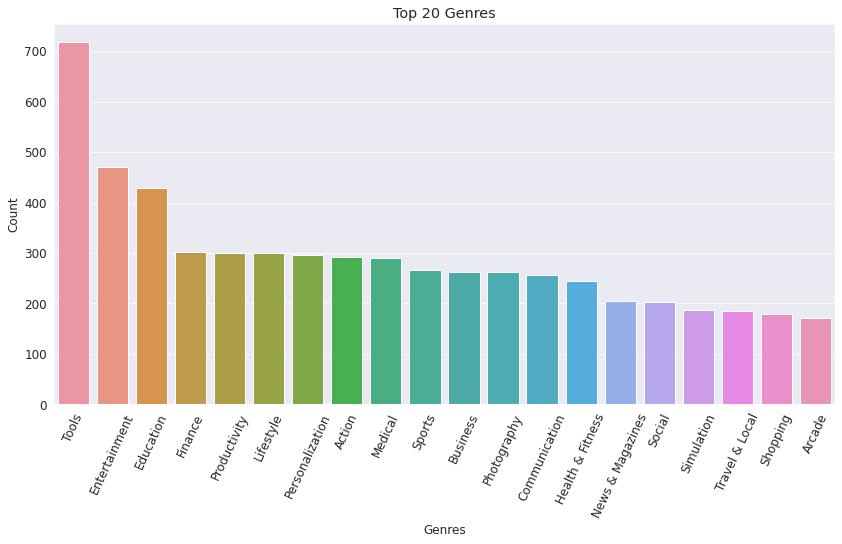

In [ ]:
best_gen = data1_1.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})
install_no = data1_1.groupby(['Genres'])[['Installs']].sum()
final_install = pd.merge(best_gen, install_no, on='Genres')
install_20 = final_install.head(20)
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Number of Application")
plt.title("Top 20 Genres")
sns.barplot(install_20.Genres, install_20.Count)
plt.show()

# What are the most popular Genres among the top 20 Genres?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


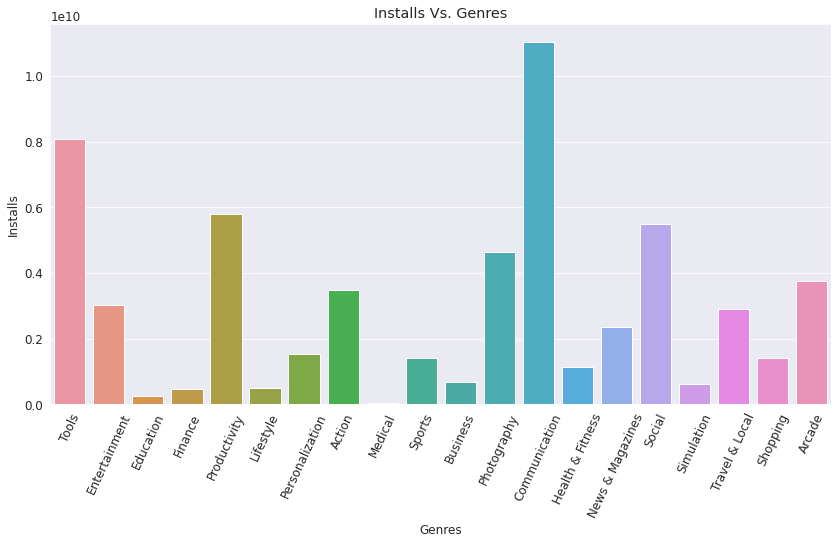

In [ ]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Installs")
plt.title("Installs Vs. Genres")
sns.barplot(install_20.Genres, install_20.Installs)
plt.show()

**As the following two graphs demonstrate: Although the majority of apps in the Google Play Store fall under the Tools, Entertainment, and Education categories, the situation is not the same in terms of installation and demand in the market. Communication, Tools, and Productivity are the genres with the most apps installed.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


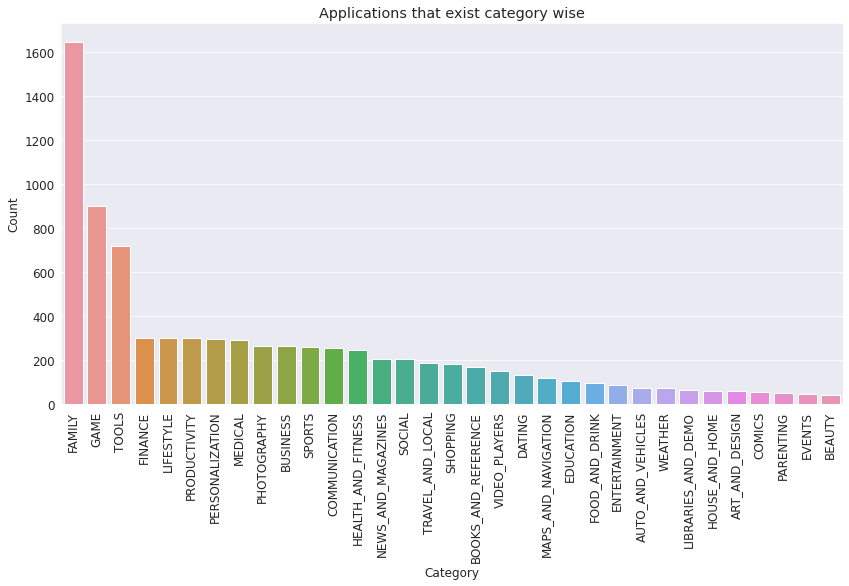

In [ ]:
best_cat = data1_1.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})
cat_install = data1_1.groupby(['Category'])[['Installs']].sum()
best_cat_install = pd.merge(best_cat, cat_install, on='Category')
best_20_cat_install = best_cat_install
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of application")
plt.title("Applications that exist category wise")
sns.barplot(best_20_cat_install.Category, best_20_cat_install.Count)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


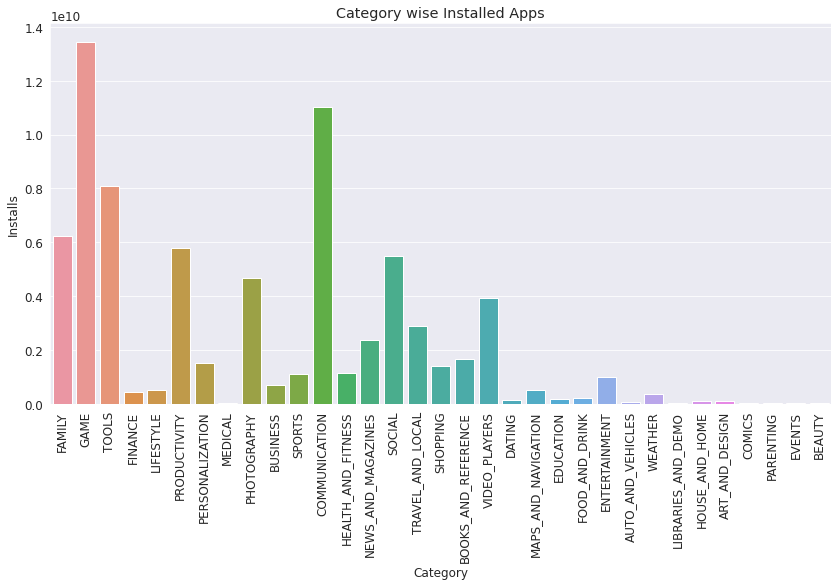

In [ ]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Category wise Installed Apps")
sns.barplot(best_20_cat_install.Category, best_20_cat_install.Installs)
plt.show()

**As may be seen from the two graphs above: The majority of apps in the Google Play Store are in the Family, Games, and Tools categories, however the scenario is not the same in terms of installation and demand in the market. Games, Communication, and Tools have the most installed apps.**

In [ ]:
average_rating_of_apps = data1_1.groupby(['Genres'])[['Rating']].mean()

In [ ]:
ratings_of_genres = pd.merge(best_gen, average_rating_of_apps, on='Genres')

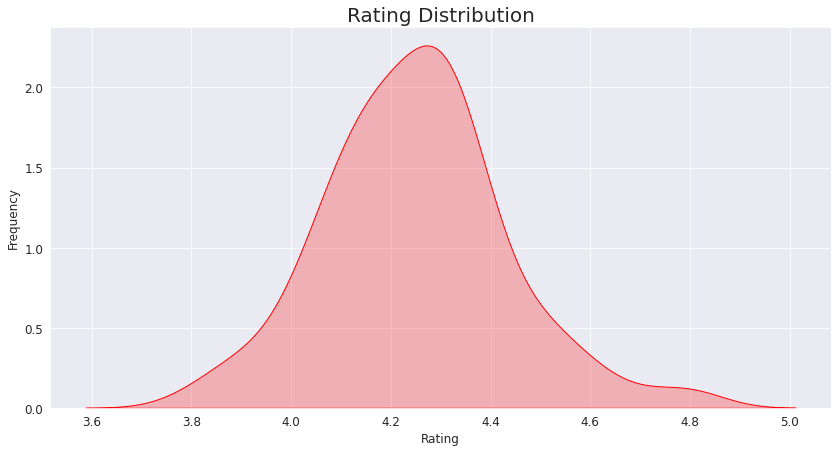

In [ ]:
plt.figure(figsize=(14,7))
g = sns.kdeplot(ratings_of_genres.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Rating Distribution',size = 20)
plt.show()

# Highest and Lowest Performing Genres

In [ ]:
ratings_of_genres.sort_values('Rating', ascending =False, inplace=True)

In [ ]:
high_rating_gen = ratings_of_genres.iloc[0:20]
low_rating_gen = ratings_of_genres.iloc[-20:]
low_rating_gen = low_rating_gen[low_rating_gen['Rating'].notnull()]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


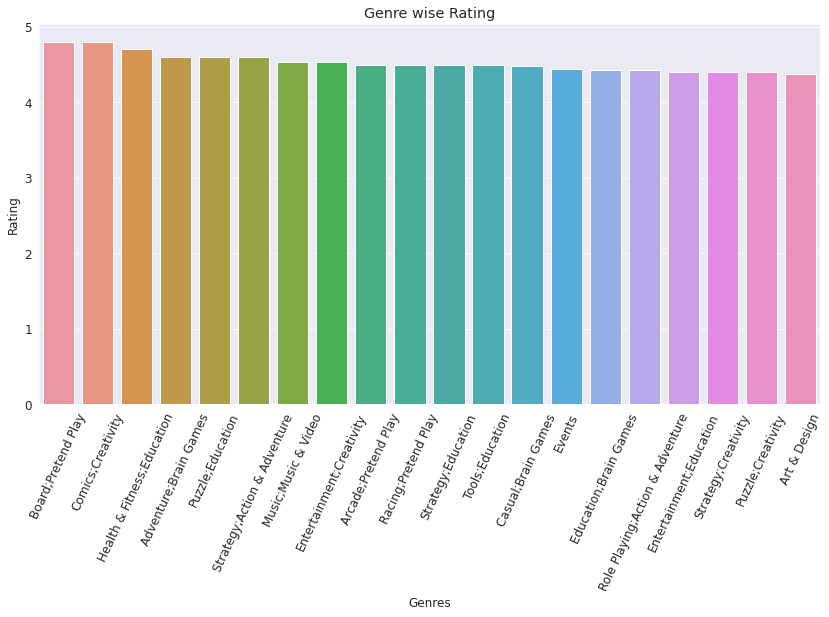

In [ ]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Genre wise Rating")
sns.barplot(high_rating_gen.Genres, high_rating_gen.Rating)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


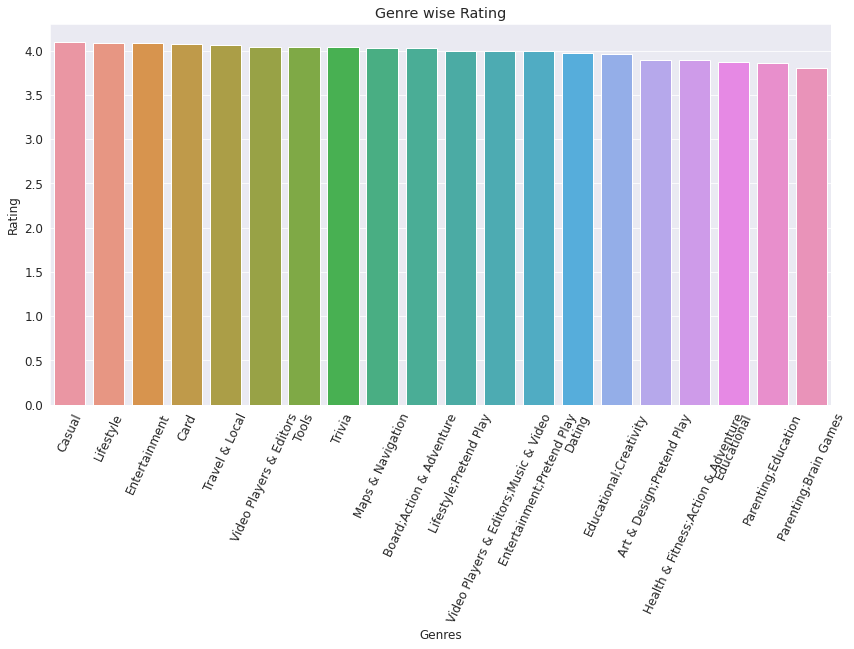

In [ ]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Genre wise Rating")
sns.barplot(low_rating_gen.Genres, low_rating_gen.Rating)
plt.show()

# What are the count of applications in each category differentiated by their type?


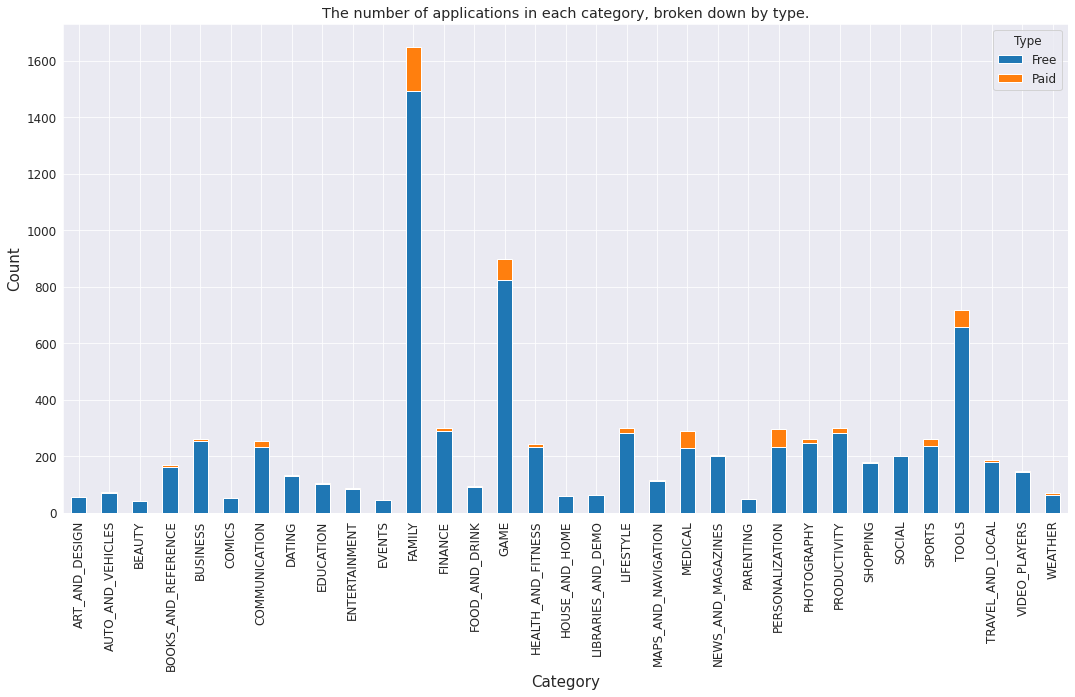

In [ ]:
count_of_apps = data1_1.groupby(['Category','Type'])[['App']].count().reset_index().rename(columns={'App':'Count','index':'App'})
count_of_apps_data1_1 = count_of_apps.pivot('Category', 'Type', 'Count').fillna(0).reset_index()
count_of_apps_data1_1.set_index('Category').plot(kind='bar', stacked=True, figsize=(18,9))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("The number of applications in each category, broken down by type.")
plt.show()

**It appears that some app categories have more free apps to download than others. The majority of apps in the Family, Food & Drink, Tools, and Social categories in our sample were free to download. At the same time, the categories of Family, Sports, Tools, and Medical had the most paid apps accessible for download.**

# How many apps were installed according to its type?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


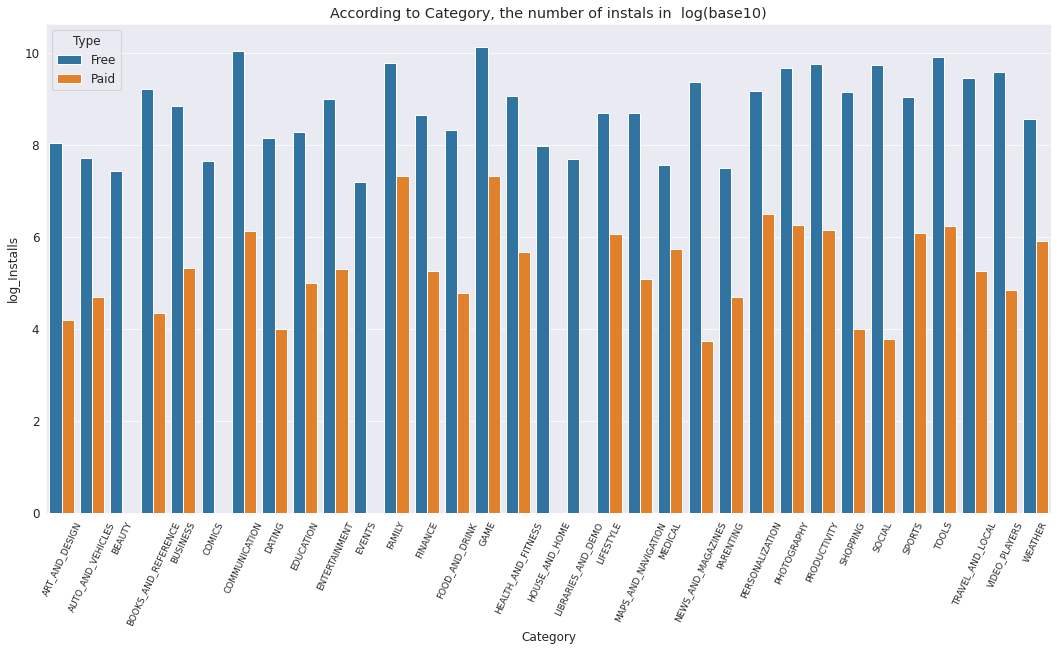

In [ ]:
data1_1['Gaming Apps'] = data1_1['Category']=='GAME'
install_by_cat = data1_1.groupby(['Category','Type'])[['Installs']].sum().reset_index()
install_by_cat['log_Installs'] = np.log10(install_by_cat['Installs'])
plt.figure(figsize=(18,9))
plt.xticks(rotation=65,fontsize=9)
plt.xlabel("Category")
plt.ylabel("Installs(base10)")
plt.title("According to Category, the number of instals in  log(base10)")
sns.barplot('Category', 'log_Installs', hue='Type', data = install_by_cat);
plt.show()

**It can be concluded that the number of free programmes installed by users is more than the number of paid applications.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


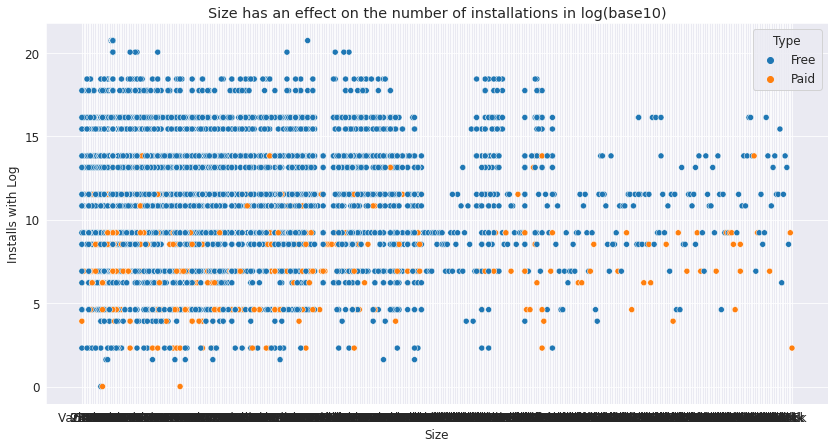

In [ ]:
plt.figure(figsize=(14,7))
plt.title("Size has an effect on the number of installations in log(base10)")
sns.scatterplot(data1_1['Size'], data1_1['Installs with Log'], hue=data1_1['Type'])
plt.show()

**The above-mentioned graphic shows how size might affect the number of installations. Users are less likely to install bulky programmes.**

# Histogram for various attributes

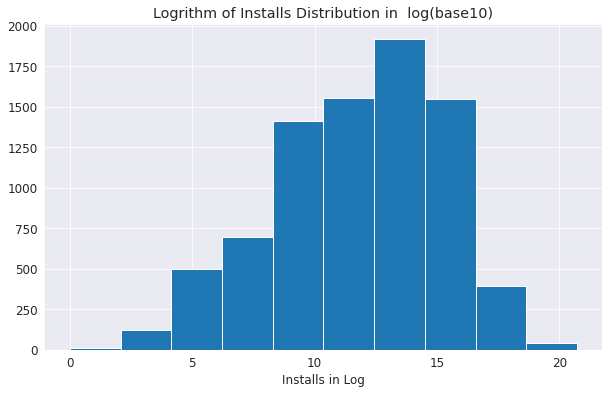

In [ ]:
data1_1.loc[data1_1['Installs with Log']==data1_1['Installs with Log'].min(),'Installs with Log']=0
plt.xlabel("Installs in Log")
plt.title("Logrithm of Installs Distribution in  log(base10)")
plt.hist(data1_1['Installs with Log']);

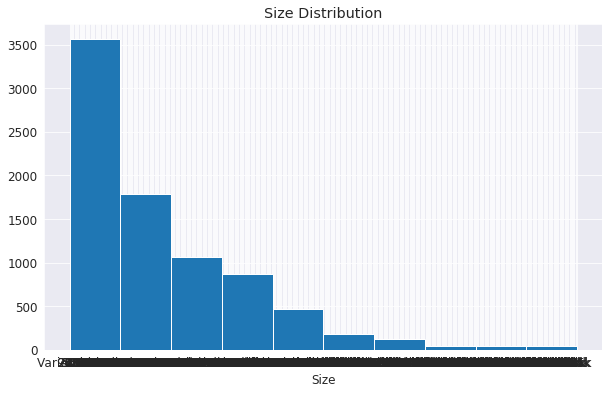

In [ ]:
plt.xlabel("Size")
plt.title("Size Distribution")
plt.hist(data1_1['Size']);
plt.show()

# Now, we will merge the seocnd dataset with the current dataset

In [ ]:
data_merge = data1_1.merge(data2, on="App")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


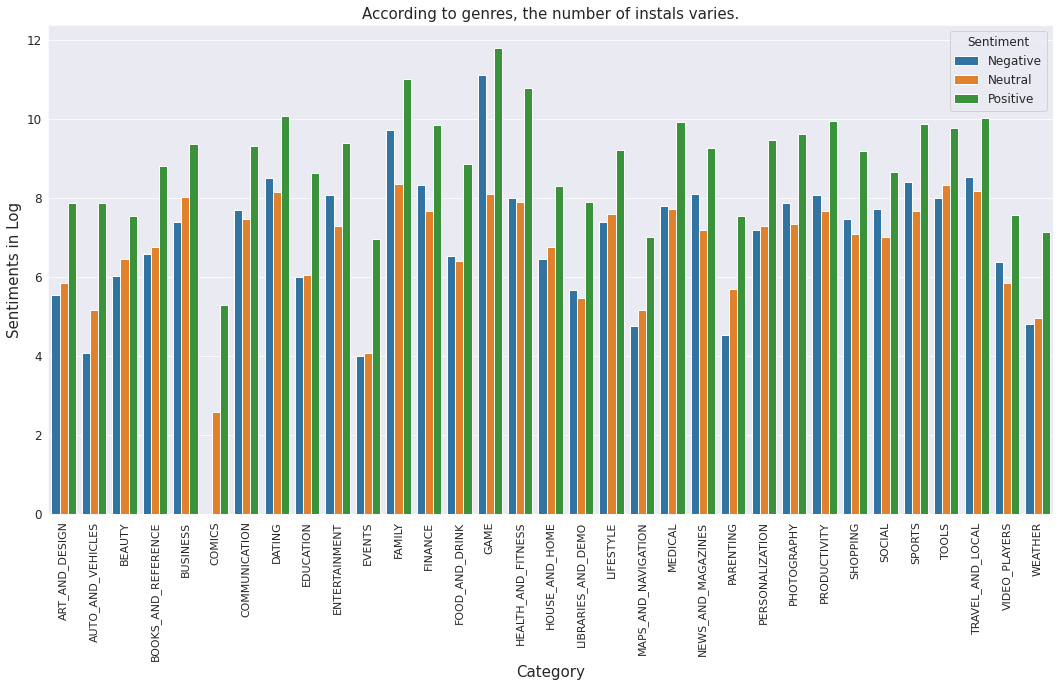

In [ ]:
sentiments = data_merge.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')
sentiments['Sentiments in Log'] = np.log2(sentiments['Sentiment Count'])
plt.figure(figsize=(18,9))
plt.xticks(rotation=90,fontsize=11)
plt.xlabel("Category", fontsize=15)
plt.ylabel("Installs", fontsize=15)
plt.title("According to genres, the number of instals varies.",fontsize=15)
sns.barplot('Category', 'Sentiments in Log', hue='Sentiment', data = sentiments);

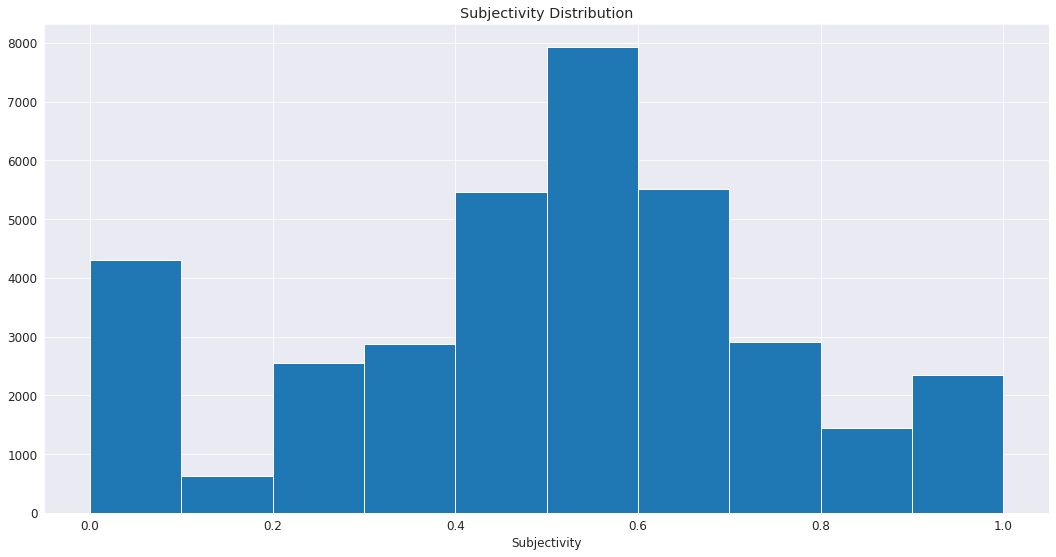

In [ ]:
plt.figure(figsize=(18,9))
plt.xlabel("Subjectivity")
plt.title("Subjectivity Distribution")
plt.hist(data_merge[data_merge['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.show()

# Review Sentiments as a Percentage

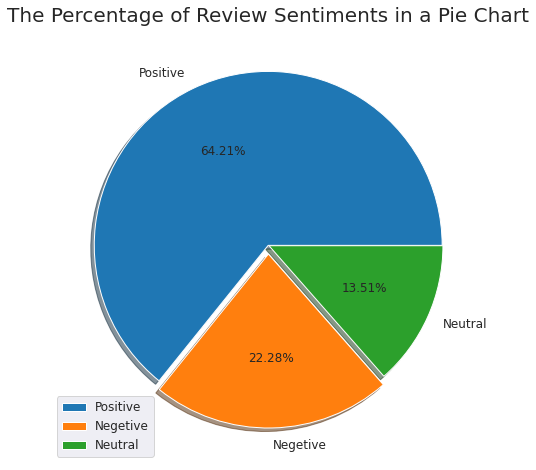

In [ ]:
import matplotlib
counting = list(data_merge['Sentiment'].value_counts())
label_names = 'Positive', 'Negetive','Neutral'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (8, 8)
plt.pie(counting, labels=label_names, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title('The Percentage of Review Sentiments in a Pie Chart', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()